In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 

In [23]:
def orientation(p, q, r):
    val = (q[1] - p[1]) * (r[0] - q[0]) - (q[0] - p[0]) * (r[1] - q[1])
    if val == 0: return 0  # colinear
    return 1 if val > 0 else 2  # horário (1) ou anti-horário (2)

def polar_angle(p0, p1):
    y_span = p1[1] - p0[1]
    x_span = p1[0] - p0[0]
    return np.arctan2(y_span, x_span)

def distance(p0, p1):
    return (p1[0] - p0[0])**2 + (p1[1] - p0[1])**2

def graham_scan(points):
    n = len(points)

    # ponto com a coordenada y mais baixa
    ymin = min(points, key=lambda x: x[1])
    min_index = points.index(ymin)
    points[0], points[min_index] = points[min_index], points[0]  # troca o ponto inicial com o primeiro ponto

    # ordena os pontos por ângulo polar e depois por distância
    pivot = points[0]
    sorted_points = sorted(points[1:], key=lambda x: (polar_angle(pivot, x), -distance(pivot, x))) # ordena por ângulo polar e depois por distância em caso de empate

    # inicializa a pilha
    stack = [pivot, sorted_points[0], sorted_points[1]]

    # processamento
    for point in sorted_points[2:]:
        # enquanto houver mudança de direção no sentido horário, remove o último ponto da pilha
        while len(stack) > 1 and orientation(stack[-2], stack[-1], point) !=2:
            stack.pop()
        stack.append(point)
    
    return stack


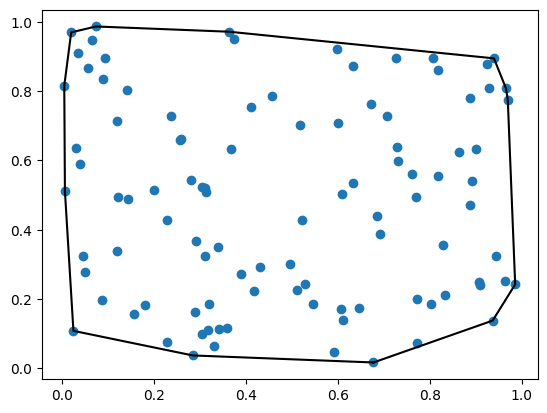

In [26]:
# gera 100 pontos 2D
np.random.seed(42)
points = np.random.rand(100, 2)
plt.scatter(points[:, 0], points[:, 1])

# calcula envoltória convexa
hull = graham_scan(points.tolist())

# plota a envoltória convexa
hull.append(hull[0])  # adiciona o primeiro ponto ao final para fechar o polígono
hull = np.array(hull)
plt.plot(hull[:, 0], hull[:, 1], 'k-')
plt.show()

In [24]:
# Função para verificar se dois segmentos se interceptam
def doIntersect(p1, q1, p2, q2):
    o1 = orientation(p1, q1, p2)
    o2 = orientation(p1, q1, q2)
    o3 = orientation(p2, q2, p1)
    o4 = orientation(p2, q2, q1)

    if o1 != o2 and o3 != o4:
        return True

    return False

As classes são separáveis linearmente.


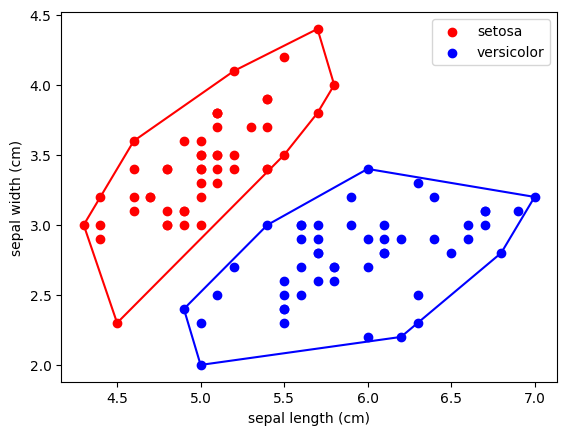

In [29]:
from sklearn.datasets import load_iris

# Carregar o dataset Iris
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = iris.target_names[iris.target]

# Filtrar para obter apenas duas classes
filtered_df = df[df['species'].isin(['setosa', 'versicolor'])]

# Separar os pontos das duas classes
class1_points = filtered_df[filtered_df['species'] == 'setosa'][df.columns[:2]].values
class2_points = filtered_df[filtered_df['species'] == 'versicolor'][df.columns[:2]].values

# Calcular as envoltórias convexas
hull_class1 = graham_scan(class1_points.tolist())
hull_class2 = graham_scan(class2_points.tolist())

# Verificar se as envoltórias convexas se interceptam
are_separable = True
for i in range(len(hull_class1) - 1):
    for j in range(len(hull_class2) - 1):
        if doIntersect(hull_class1[i], hull_class1[i + 1], hull_class2[j], hull_class2[j + 1]):
            are_separable = False
            break

# Imprimir o resultado
if are_separable:
    print("As classes são separáveis linearmente.")
else:
    print("As classes não são separáveis linearmente.")

# Plotar os pontos e as envoltórias convexas
plt.scatter(class1_points[:, 0], class1_points[:, 1], c='r', label='setosa')
plt.scatter(class2_points[:, 0], class2_points[:, 1], c='b', label='versicolor')

hull_class1.append(hull_class1[0])
hull_class1 = np.array(hull_class1)
plt.plot(hull_class1[:, 0], hull_class1[:, 1], 'r-')

hull_class2.append(hull_class2[0])
hull_class2 = np.array(hull_class2)
plt.plot(hull_class2[:, 0], hull_class2[:, 1], 'b-')

plt.xlabel(df.columns[0])
plt.ylabel(df.columns[1])
plt.legend()
plt.show()